In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset


In [89]:
k = 10
cols=['alpha', 'q0', 'q1', 'm0','m1','V0','V1','FEn','Energy','Entropy','TrError'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

# Finite temperature

## Import Data

### Error function data

## Plots

In [152]:
"""
Visualization Settings for Student-Teacher Model Experiments

This script configures plotting aesthetics and initializes variables for visualizing
experimental and theoretical results related to generalization error, overlaps, and 
phase transitions in neural network models.

Author: Your Name
Date: YYYY-MM-DD
"""


# Activation functions to consider
activ_function = ['relu', 'erf']


# Set global plot parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 10
})

# Marker and color settings
m_size = 4
diag_ts_color = "red"
off_ts_color = "blue"
error_color = "black"
markeredgecolor = 'orange'
markeredgecolor_list = ["red", "blue", "black"]
ecolor = "gray"
markers = ['-', '--', 's', 'o', 'o', 'D']
alpha_list = np.linspace(1.0, 0.8, 4)

# Legend/label names
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = r"LD Random Init"
LD_name_init_planted = "LD Planted Init"

# Line width settings
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.4
linewidth_theory_meta = 1.0

# Font and color settings
fontsize = 13
color_num = "white"
color_num_planted = "orange"
vertical_line_color = "green"  

# Initialize legend elements
legend_elements = []

# Placeholder lists to store extrema
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []

# Indices for plotting
planted_indice = 2
random_indice = 3
theo_indice_spe = 0
theo_indice_meta = 1

# Labels and observables
label_list = ["non_specialized", "specialized", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]

# Critical alpha thresholds for phase transitions
alpha_t_list = {'relu': 1.18, 'erf': 12.23}
vertical_line = {"erf": [1.0e-2, 2e-2]}

# Plot parameters
xvar = 'alpha'
color = 'tab:red'
alpha_first_t = 7.9
y1_max = 1.0
y1_min = -0.01
yline = np.linspace(y1_min, y1_max, 900)  # Y-axis range for vertical lines or guides

# Update LaTeX text rendering and fonts (NeurIPS style)
text_fontsize = 16
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,
    "font.size": text_fontsize,
    "legend.fontsize": text_fontsize,
    "xtick.labelsize": text_fontsize,
    "ytick.labelsize": text_fontsize,
})

relu 1.18
erf 12.23


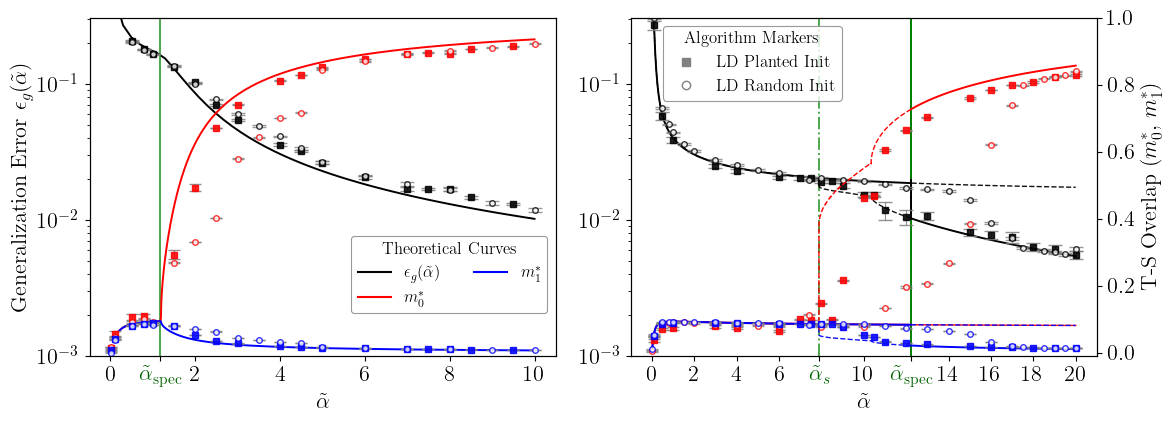

In [153]:
# Create subplots: one per activation function
fig, axes = plt.subplots(1, len(activ_function), figsize=(12, 5))

for i, key in enumerate(activ_function):
    
    alpha_t = alpha_t_list[key]
    print(key,alpha_t)
    
    
    if len(activ_function)>1: 
        ax1=axes[i]
        #ax1.grid(True)
    
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
    #ax1.axvline(alpha_t, color=vertical_line_color, linewidth=linewidth_theory)
    
    ###Vertical line
    if key=="erf":
        colors = np.where(yline <= vertical_line[key][0], vertical_line_color, np.where(yline <=  vertical_line[key][1],
                                                                                                 error_color, vertical_line_color))
        for i in range(len(yline) - 1):
            ax1.plot([alpha_t, alpha_t], [yline[i], yline[i + 1]], color=colors[i], linewidth=linewidth_theory)
    

    #THEORY 
    Th_directory = f"data_for_figures/{key}_beta10_lambda0p1/Theory/"
    
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
    if key=="erf":
        TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
        ax1.axvline(alpha_first_t, color=vertical_line_color, linestyle='-.', alpha=0.7, linewidth=linewidth_theory)

        
        
    
    # Error
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None)
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)
    if key=="erf":
        error_2 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)

    # EXPERIMENTS
    Ex_directory = f"data_for_figures/{key}_beta10_lambda0p1/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt', names=colsN, header=None,sep=' ')

    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]<alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]<alpha_t], '-', color='k')
    #ax1.semilogy(error_erf10_0[xvar][error_erf10_0[xvar]>alpha_t],  error_erf10_0['val'][error_erf10_0[xvar]>alpha_t], '--', color='gray')


    # -- specialized sol -- 
    #(unstable_error,) = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_memo])
    if key=="relu":
        spe_error = ax1.semilogy(error_1[xvar],  2*error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        #spe_error_0 = ax1.semilogy(error_0[xvar],  2*error_0['val'], '-.', color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]

        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
        ax1.axvline(alpha_t, color=vertical_line_color, linestyle='-', alpha=0.7, linewidth=linewidth_theory)
    elif key=="erf":
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t],  2*error_1['val'][error_1[xvar]>alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  2*error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t],  2*error_0['val'][error_0[xvar]<alpha_t], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  2*error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))


    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
                                capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    ax1.tick_params(axis='y')
    
    
    
    if i == 0:
        ax1.set_ylabel(r"Generalization Error $\epsilon_g (\tilde{\alpha})$") #,fontsize=fontsize)
        
    #ax1.text(0.05, 0.95, f'({chr(97+i)})', transform=ax1.transAxes, 
    #            fontsize=14, va='top')
    

    # Twin axes for ax2
    ax2 = ax1.twinx()
    ax2.set_ylim(y1_min, y1_max)
    #ax2.grid(True)
    
    if key=="erf":
        ax2.set_ylabel(r'T-S Overlap ($m^*_0$, $m^*_1$)') #,fontsize=fontsize)
    else:
        ax2.set_yticks([])

    # -- specialized sol -- 
    if key=="relu":
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'] + TS_1['m1'] / k, '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        spe_off_overlap = ax2.plot(TS_1[xvar], TS_1['m1'] / k, markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
        #spe_diag_overlap_0 = ax2.plot(TS_0[xvar], TS_0['m0'] + TS_0['m1'] / k, '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        #spe_off_overlap_0 = ax2.plot(TS_0[xvar], TS_0['m1'] / k, markers[theo_indice_meta], color=off_ts_color, linewidth=linewidth_theory)[0]
        overlap_max_list.append(max(TS_1['m0'] + TS_1['m1'] / k))
        overlap_min_list.append(min(TS_1['m1'] / k))
        
    elif key=="erf":
        spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t], TS_1['m0'][TS_1[xvar]>alpha_t] + TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                       markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t], TS_1['m0'][TS_1[xvar]<alpha_t] + TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                       markers[theo_indice_meta], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory_meta)[0]
        unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t], TS_0['m0'][TS_0[xvar]<alpha_t] + TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                            markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m0'][TS_0[xvar]>alpha_t] + TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                            markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        
        spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t],TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                       markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t],TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                       markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t],TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                            markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                            markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        overlap_max_list.append(max([max(TS_1['m0'] + TS_1['m1'] / k), max(TS_0['m0'] + TS_0['m1'] / k)]))
        overlap_min_list.append(min([min(TS_1['m0'] + TS_1['m1'] / k), min(TS_0['m0'] + TS_0['m1'] / k)]))
        
        
    


    # -- experiments --
    #Diagonal
    planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
    random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                       alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)

    #OffDiagonal
    planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=off_ts_color, markersize=m_size,
                                       alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
    random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=color_num, markersize=m_size,
                                      alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
    
    
    ax1.set_xlabel(r'$\tilde{\alpha}$') #, fontsize=fontsize)
    ax1.set_label("")
    
    
    # Get current ticks
    current_ticks = ax1.get_xticks()[0]
    if key=="relu":
        current_ticks=np.arange(0, 12,2)
    else:
        current_ticks=np.array([0, 2, 4, 6, 10, 14, 16, 18, 20]) #np.arange(0, 22,3)

    # Add new tick(s)
    if key == "erf":
        new_tick = [alpha_first_t, alpha_t]
        new_label = [r'$\tilde{\alpha}_s$', r'$\tilde{\alpha}_{\rm spec}$']
    else:
        new_tick = [alpha_t]
        new_label = [r'$\tilde{\alpha}_{\rm spec}$']

    # Remove any overlapping ticks
    def remove_nearby(ticks, values, tol=1e-2):
        return np.array([t for t in ticks if not np.any(np.isclose(t, values, atol=tol))])

    current_ticks = remove_nearby(current_ticks, new_tick)

    # Merge ticks
    all_ticks = np.append(current_ticks, new_tick)
    all_ticks = np.unique(all_ticks)

    # Map labels
    tick_label_dict = dict(zip(new_tick, new_label))
    all_labels = [tick_label_dict.get(tick, f'{tick:.0f}') for tick in all_ticks]

    # Apply ticks and labels
    ax1.set_xticks(all_ticks)
    ax1.set_xticklabels(all_labels)

    # Recolor special labels
    for tick, label in zip(all_ticks, ax1.get_xticklabels()):
        if tick in new_tick:
            label.set_color('darkgreen')
    
    
    
# Set the same y-axis limits
y_min = min(error_min_list)  # Find minimum y value
y_min=1e-3
y_max = max(error_max_list)  # Find maximum y value
y1_min = min(overlap_max_list)
y1_max = max(overlap_min_list)

for i, key in enumerate(activ_function):
    axes[i].set_ylim(y_min, y_max)
    

legend_handles_1 = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g (\tilde{\alpha})$'),
    mlines.Line2D([], [], color=diag_ts_color, linestyle=markers[theo_indice_spe], label=r' $m^*_0$'),
    mlines.Line2D([], [], color=off_ts_color, linestyle=markers[theo_indice_spe], label=r' $m^*_1$')
]

legend_handles_2 = [
    mlines.Line2D([], [], color="gray", markeredgecolor="gray", marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
    mlines.Line2D([], [], color=color_num, markeredgecolor="gray", marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
]

# Create the legends and assign to specific axes
legend1 = axes[0].legend(
    handles=legend_handles_1,
    bbox_to_anchor=(1.0, 0.38),
    ncol=2,
    loc='upper right',
    frameon=True,
    fontsize=12,  # Adjust this value as needed
    title="Theoretical Curves",
    title_fontsize=12  # Optional: separate title font size
)

legend2 = axes[1].legend(
    handles=legend_handles_2,
    loc='upper left',
    bbox_to_anchor=(0.05, 1.0),
    ncol=1,
    frameon=True,
    fontsize=12,  # Adjust this value as needed
    title="Algorithm Markers",
    title_fontsize=12
)

# Optional: match styling
for legend in [legend1, legend2]:
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.8)

fig.tight_layout()


#legend.get_frame().set_edgecolor('gray')

# Layout and show
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Shrink plot to leave room on the right
#plt.tight_layout(rect=[0, 0.1, 1, 1])


# Save figure
plt.savefig(f"figures/finite_temperature_erf_relu_final.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [150]:
activ_function = ['relu', 'erf']


m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
error_color_bo = "tab:orange"
#markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'D']
alpha_list = np.linspace(1.0,0.8, 5)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = "Random Init "
LD_name_init_planted = "Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.4
linewidth_theory_meta = 1.0

linewidth_theory_vertical = linewidth_theory
fontsize=13
color_num="white"
color_num_planted="orange"
vertical_line_color="green" #"magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []
plot_activ_function=True
GD_exist = True
GD_indice = 4
#1.235, 1.12

planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'erf':1.5, 'relu':1.2}
alpha_first_t = {'erf':0.8, 'relu':1.1}

with_overlap = False
name_file_pdf = f"zeroTermperature_erf_relu_with_overlap_{with_overlap}"

# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
#alpha_first_t = 0.85
y1_max=1.0
y1_min=-0.01
y_min=0.3*1e-4
y_max=0.5 #1e0
x_min=0.2
x_max=5.1

yline = np.linspace(y_min, y_max, 900)  # Define y-axis range

colors = np.where(yline < 0.2, vertical_line_color, np.where(yline < 0.4, error_color, vertical_line_color))

#vertical_line = {"erf":[1e-3+1.19e-4, 1e-2], "relu":[1e-2, 1e-1-0.02]}
vertical_line = {"relu":[1e-2+0.008, 1e-1+0.05], "erf":[2e-3+0.0006, 1e-2+0.01]}

text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})
GD_color="red"

relu 1.2
GD
erf 1.5
GD


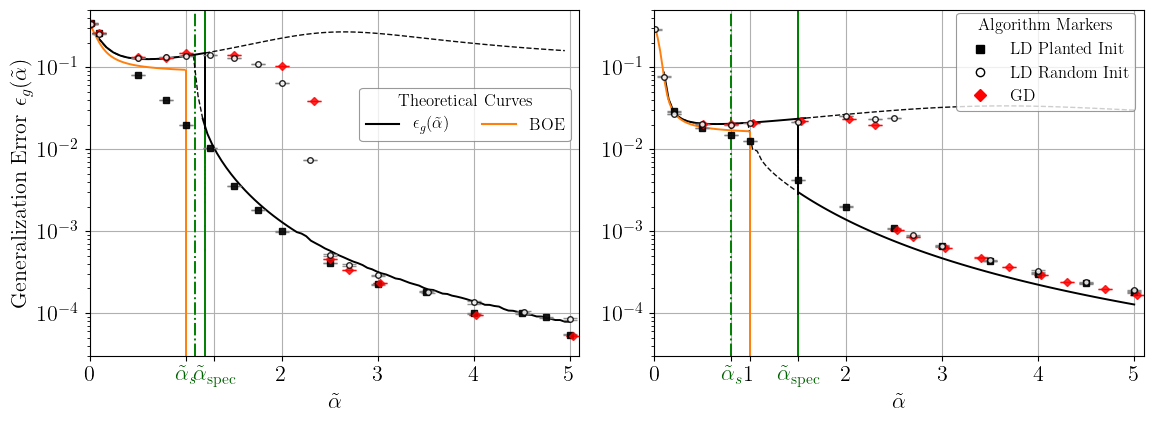

In [151]:
fig, axes = plt.subplots(1, len(activ_function), figsize=(12, 5))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})


# Plot on ax1 - ERROR
# -- non specialized sol -- 
for i, key in enumerate(activ_function):
    
    alpha_t = alpha_t_list[key]
    print(key,alpha_t)
    x_ticks = np.arange(0, 6, 1)
    
    if len(activ_function)>1: 
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
        
    #Limit
    ax1.set_xlim(x_min, x_max)
    
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g (\tilde{\alpha})$')
    #ax1.axvline(alpha_t, color=vertical_line_color, linewidth=linewidth_theory)
    #treshold_
    
    colors = np.where(yline <= vertical_line[key][0], vertical_line_color, np.where(yline <=  vertical_line[key][1],
                                                                                                 error_color, vertical_line_color))
    for i in range(len(yline) - 1):
        ax1.plot([alpha_t, alpha_t], [yline[i], yline[i + 1]], color=colors[i], linewidth=linewidth_theory_vertical)

    #THEORY 
    Th_directory = f"data_for_figures/{key}_betainf_lambda0p01/Theory/"
    
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
    error_bo = pd.read_csv(Th_directory+'Error_BO.txt', names=colse, header=None)

    if key=="erf":
        TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
     
    #First phase transition   
    ax1.axvline(alpha_first_t[key], color=vertical_line_color, linestyle='-.', linewidth=linewidth_theory)
    
    
    # Get current ticks
    current_ticks = ax1.get_xticks()[0]
    current_ticks=np.arange(0, 6,1) #np.array([0, 2, 4, 6, 10, 14, 16, 18, 20]) #np.arange(0, 22,3)
    new_tick = [alpha_first_t[key], alpha_t]
    # Add new tick(s)
    if key=="relu":
        current_ticks=np.array([0, 2, 3, 4, 5]) #np.array([0, 2, 4, 6, 10, 14, 16, 18, 20])
        alpha_t_p=alpha_t+0.1
        alpha_first_t_p=alpha_first_t[key]-0.1
        new_tick = [alpha_first_t_p, alpha_t_p]
    new_label = [r'$\tilde{\alpha}_s$', r'$\tilde{\alpha}_{\rm spec}$']


    # Merge ticks
    all_ticks = np.append(current_ticks, new_tick)
    all_ticks = np.unique(all_ticks)

    # Map labels
    tick_label_dict = dict(zip(new_tick, new_label))
    all_labels = [tick_label_dict.get(tick, f'{tick:.0f}') for tick in all_ticks]

    # Apply ticks and labels
    ax1.set_xticks(all_ticks)
    ax1.set_xticklabels(all_labels)

    # Recolor special labels
    for tick, label in zip(all_ticks, ax1.get_xticklabels()):
        if tick in new_tick:
            label.set_color('darkgreen')

    


    # EXPERIMENTS
    Ex_directory = f"data_for_figures/{key}_betainf_lambda0p01/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt', names=colsN, header=None,sep=' ')

    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    


    # -- specialized sol -- 
    if key=="relu" and plot_activ_function:
        error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None)
        error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)

        
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t - 0.025],  2*error_1['val'][error_1[xvar]>alpha_t - 0.025], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  2*error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t + 0.01],  2*error_0['val'][error_0[xvar]<alpha_t  + 0.01], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  2*error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
        
    elif key=="relu":
        spe_error = ax1.semilogy([],  [], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        
    elif key=="erf":
        error_0 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)
        error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None)
        
        #error_2 = pd.read_csv(Th_directory+'Error_2.txt', names=colse, header=None)
        
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]>alpha_t - 0.029],  2*error_1['val'][error_1[xvar]>alpha_t - 0.029], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error = ax1.semilogy(error_1[xvar][error_1[xvar]<alpha_t],  2*error_1['val'][error_1[xvar]<alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        spe_error_2 = ax1.semilogy(error_0[xvar][error_0[xvar]<alpha_t + 0.08],  2*error_0['val'][error_0[xvar]<alpha_t  + 0.08], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
        spe_error_3 = ax1.semilogy(error_0[xvar][error_0[xvar]>alpha_t],  2*error_0['val'][error_0[xvar]>alpha_t], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory_meta)[0]
        error_max_list.append(max(error_1['val']))
        error_min_list.append(min(error_1['val']))
        
    # Split the data based on xvar threshold
    mask_x_leq_1 = error_bo[xvar] < 1
    x_vals_bo = error_bo[xvar][mask_x_leq_1]
    y_vals_bo =  error_bo['val'][mask_x_leq_1]

    # Plot the curve for x <= 1
    error_bo_plt = ax1.semilogy(x_vals_bo, y_vals_bo, color=error_color_bo, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)

    # Get the last x and y value from the curve to draw vertical line
    x_last_bo = x_vals_bo.iloc[-1]
    y_last_bo = y_vals_bo.min()

    # Plot vertical line at x = 1 (or x_last), from y_last upward
    ax1.vlines(x=1, ymin=0, ymax=y_last_bo, color=error_color_bo, linestyle='-', linewidth=linewidth_theory)


    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'],
                                 error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=GD_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=GD_color,ecolor=GD_color
                            )
            
    error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
                                capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    

    ax1.tick_params(axis='y')
    
    if i == 0:
        ax1.set_ylabel(r'Generalization Error$ \epsilon_g(\tilde{\alpha}))$') #,fontsize=fontsize)
    

    #ADD Overlap on the plot
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        ax2.set_ylim(y1_min, y1_max)
        ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$') #,fontsize=fontsize)
            

        # -- specialized sol -- 
        if key=="relu":
            spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'] + TS_1['m1'] / k, '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
            spe_off_overlap = ax2.plot(TS_1[xvar], TS_1['m1'] / k, markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            overlap_max_list.append(max(TS_1['m0'] + TS_1['m1'] / k))
            overlap_min_list.append(min(TS_1['m1'] / k))
            
        elif key=="erf":
            spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t], TS_1['m0'][TS_1[xvar]>alpha_t] + TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                        markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            spe_diag_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t], TS_1['m0'][TS_1[xvar]<alpha_t] + TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                        markers[theo_indice_meta], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t], TS_0['m0'][TS_0[xvar]<alpha_t] + TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                                markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            unstable_diag_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m0'][TS_0[xvar]>alpha_t] + TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                                markers[theo_indice_spe], color=diag_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]
            
            
            spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]>alpha_t],TS_1['m1'][TS_1[xvar]>alpha_t] / k,
                                        markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            spe_off_overlap = ax2.plot(TS_1[xvar][TS_1[xvar]<alpha_t],TS_1['m1'][TS_1[xvar]<alpha_t] / k,
                                        markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]
            unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]<alpha_t],TS_0['m1'][TS_0[xvar]<alpha_t] / k, 
                                                markers[theo_indice_spe], color=off_ts_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
            unstable_off_overlap = ax2.plot(TS_0[xvar][TS_0[xvar]>alpha_t], TS_0['m1'][TS_0[xvar]>alpha_t] / k, 
                                                markers[theo_indice_meta], color=off_ts_color, alpha=alpha_list[theo_indice_meta], linewidth=linewidth_theory)[0]
            
            overlap_max_list.append(max([max(TS_1['m0'] + TS_1['m1'] / k), max(TS_0['m0'] + TS_0['m1'] / k)]))
            overlap_min_list.append(min([min(TS_1['m0'] + TS_1['m1'] / k), min(TS_0['m0'] + TS_0['m1'] / k)]))
            
            
        


        # -- experiments --
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'], fmt=markers[GD_indice],color=GD_color,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=GD_color,ecolor=GD_color)



        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)

        
        ax2.tick_params(axis='y')
        
        
    ax1.set_xlabel(r'$\tilde{\alpha}$') #, fontsize=fontsize)
    ax1.set_label("")
    #ax1.set_xticks(x_ticks)
    ax1.grid(True)
    ax2.grid(True)
    
    

legend_handles_1 = [
        mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $\epsilon_g(\tilde{\alpha})$'),
        mlines.Line2D([], [], color=error_color_bo, linestyle=markers[theo_indice_spe], label=r' BOE')
]

legend_handles_2 = [
        mlines.Line2D([], [], color=error_color, markeredgecolor=error_color, marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init'),
        mlines.Line2D([], [], color=color_num, markeredgecolor=error_color, marker=markers[random_indice], linestyle='None', label=r'LD Random Init'),
        mlines.Line2D([], [], color=GD_color,markeredgecolor=GD_color, marker=markers[GD_indice], linestyle='None', label=r'GD')
]

# Create the legends and assign to specific axes
legend1 = axes[0].legend(
    handles=legend_handles_1,
    bbox_to_anchor=(1.0, 0.8),
    ncol=2,
    loc='upper right',
    frameon=True,
    fontsize=12,  # Adjust this value as needed
    title="Theoretical Curves",
    title_fontsize=12  # Optional: separate title font size
)

legend2 = axes[1].legend(
    handles=legend_handles_2,
    loc='center left',
    bbox_to_anchor=(0.6, 0.85),
    ncol=1,
    frameon=True,
    fontsize=12,  # Adjust this value as needed
    title="Algorithm Markers",
    title_fontsize=12
)

# Optional: match styling
for legend in [legend1, legend2]:
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.8)


    


# Layout and show
plt.tight_layout(rect=[0, 0.1, 1, 1])


# Save figure
plt.savefig(f"figures/{name_file_pdf}.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [8]:
k = 10
cols=['alpha', 'q0', 'q1', 'm0','m1','V0','V1','FEn','Energy','Entropy','TrError'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

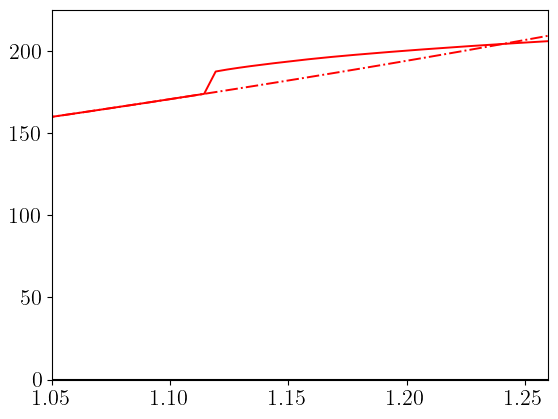

In [9]:
yvar= 'FEn'
xvar="alpha"
key="relu"
#THEORY 
Th_directory = f"data_for_figures/{key}_betainf_lambda0p01/Theory/"

# Overlaps
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
plt.plot(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
plt.plot(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)

#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
plt.xlim(1.05,1.26)
plt.ylim(0,225)
plt.axvline(12.23, color='tab:blue')
#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12

/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_9188/3646407620.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,0.02)


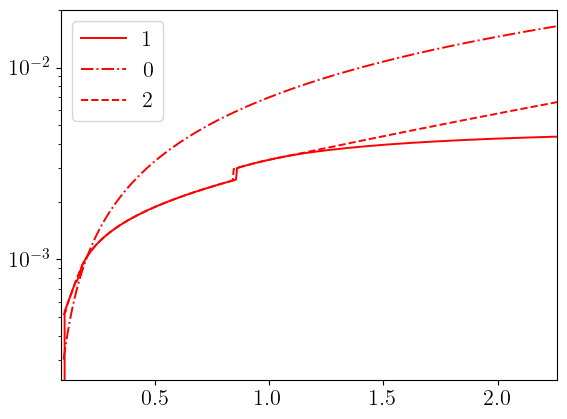

In [10]:
yvar= 'FEn'
xvar="alpha"
key="erf"
#THEORY 
Th_directory = f"data_for_figures/{key}_betainf_lambda0p01/Theory/"

# Overlaps
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)

plt.semilogy(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory,label=f'{1}')
plt.semilogy(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory,label=f'{0}')
plt.semilogy(TS_2[xvar], -TS_2[yvar] , '--', color=diag_ts_color, linewidth=linewidth_theory,label=f'{2}')


#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
plt.xlim(0.09,2.26)
plt.ylim(0,0.02)
plt.axvline(12.23, color='tab:blue')

#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12
plt.legend()
plt.show()

(0.5, 1.82)

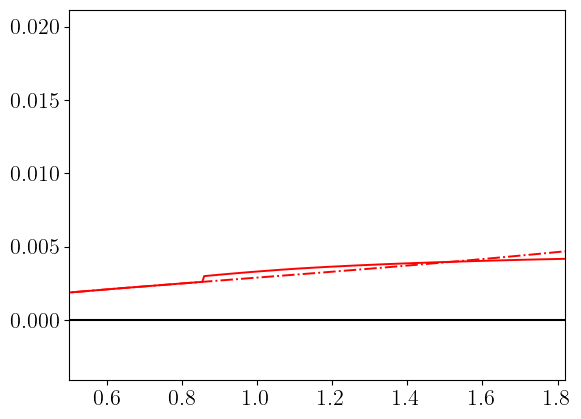

In [11]:
yvar= 'FEn'
xvar="alpha"
key="erf"
#THEORY 
Th_directory = f"data_for_figures/{key}_betainf_lambda0p01/Theory/"

# Overlaps
TS_3 = pd.read_csv(Th_directory+'TS_3.txt', names=cols, header=None)
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)

plt.axvline(0.204, color='tab:blue')
plt.axvline(0.1045, color='tab:orange')
plt.plot(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_2[xvar], -TS_2[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)
plt.plot(TS_3[xvar], -TS_3[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)

#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
#plt.ylim(0.0,0.005)
plt.xlim(0.5,1.82)


#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12

(0.5, 1.82)

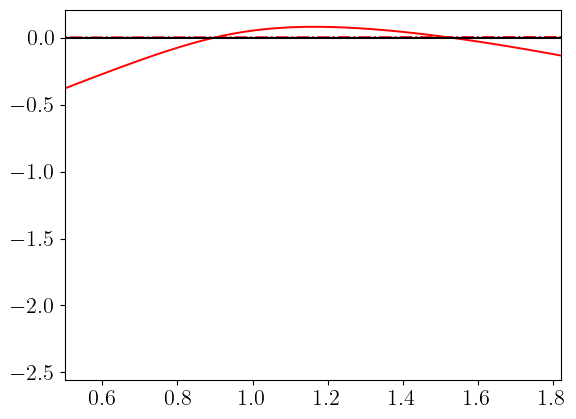

In [12]:
#yvar= ['FEn','ts_overlap','ss_overlap']
yvar= 'FEn'
xvar="alpha"
key="quadratic"
#THEORY 
Th_directory = f"data_for_figures/{key}_beta10_lambda0p1/Theory/"

# Overlaps
TS_2 = pd.read_csv(Th_directory+'TS_2.txt', names=cols, header=None)
TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None)
TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None)

plt.axvline(0.204, color='tab:blue')
plt.axvline(0.1045, color='tab:orange')
plt.plot(TS_1[xvar], -TS_1[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_2[xvar], -TS_2[yvar] , '-', color=diag_ts_color, linewidth=linewidth_theory)
#plt.plot(TS_0[xvar], -TS_0[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)
plt.plot(TS_3[xvar], -TS_3[yvar] , '-.', color=diag_ts_color, linewidth=linewidth_theory)

#yvar_off_overlap = ax2.plot(TS_0[xvar], TS_0[yvar], markers[theo_indice_spe], color=off_ts_color, linewidth=linewidth_theory)[0]
            
plt.axhline(0, color='k')
#plt.ylim(0.0,0.005)
plt.xlim(0.5,1.82)


#plt.plot(erf10_0[xvar], np.flip(erf10_1[yvar].values) - erf10_0[yvar].values,'--',color='tab:red',label='non-Sp')
#plt.plot(erf10_0[xvar], np.flip(erf10_2[yvar].values) - erf10_0[yvar].values,'--',color='tab:green',label='non-Sp')
#plt.xlim(12, 12.7)1.235, 1.12

In [13]:
def convert(name):
    index_map = {
        '0': 'd',  # "0" becomes "d" for "diagonal"
        '1': 'a'   # "1" becomes "a" for "off-diagonal" or "average"
    }
    if name == 'FEn':
        return r'$F_{\mathrm{En}}$'
    # Detect prefix (m, q, V) and suffix (0 or 1)
    if len(name) == 2 and name[1] in index_map:
        prefix = name[0].lower()
        idx = index_map[name[1]]
        return fr'${prefix}_{idx}$'
    return name

In [14]:
convert("V0")

'$v_d$'

In [15]:
dict_observable = {
    'Free Entropy': ['FEn'],
    'Teacher-Student Overlap': [r'$m_d$', r'$m_a$'],
    'Student-Student Overlap': [r'$q_d$', r'$q_a$'],
    'Difference Student-Student Overlap': [r'$v_d$', r'v_a']
}

dict_observable = {
    'Free Entropy': ['FEn'],
    'Teacher-Student Overlap': ['m0', 'm1'],
    'Student-Student Overlap': ['q0', 'q1'],
    'Difference Student-Student Overlap': ['V0', 'V1']
}

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import numpy as np

/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_9188/2776704970.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


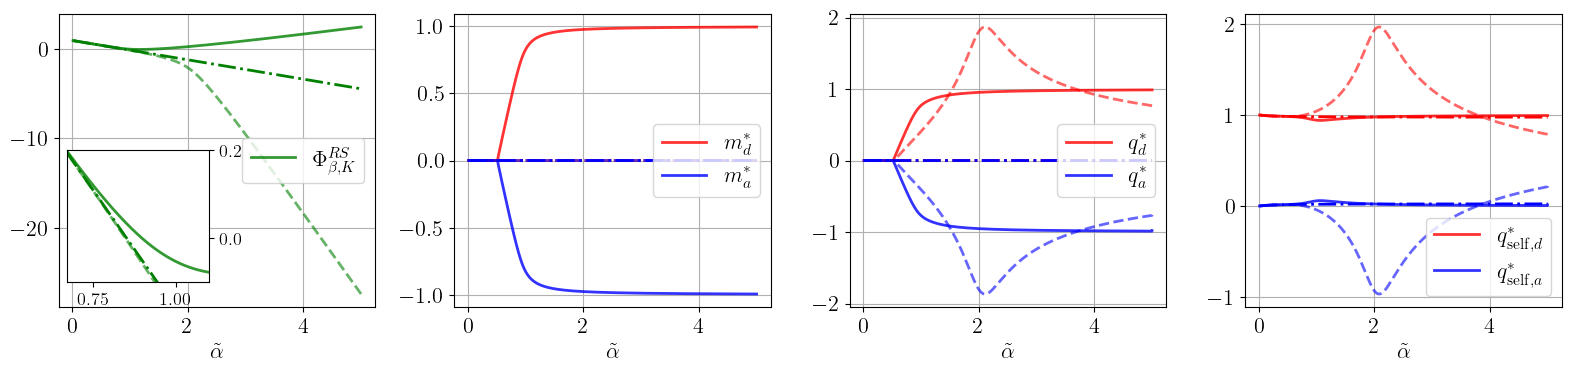

In [32]:
### Lowe case mapping
def convert(name):
    index_map = {
        '0': 'd',  # "0" becomes "d" for "diagonal"
        '1': 'a'   # "1" becomes "a" for "off-diagonal" or "average"
    }
    if name == 'FEn':
        return r'$F_{\mathrm{En}}$'
    # Detect prefix (m, q, V) and suffix (0 or 1)
    if len(name) == 2 and name[1] in index_map:
        prefix = name[0].lower()
        idx = index_map[name[1]]
        return fr'${prefix}^*_{idx}$'
    return name

# Configuration
observables = ['Free Entropy', 'Teacher-Student Overlap', 'Student-Student Overlap', 'Difference Student-Student Overlap']
figsize = (16, 4)
dict_observable = {
    'Free Entropy': ['FEn'],
    'Teacher-Student Overlap': ['m0', 'm1'],
    'Student-Student Overlap': ['q0', 'q1'],
    'Difference Student-Student Overlap': ['V0', 'V1']
}

xvar = "alpha"
key = "quadratic"
alpha_list = np.linspace(0.6, 1, 3)[::-1]
markers = ['-.', '-', '--']
colors = ["red", 'blue', "green"]
text_fontsize = 16
linewidth_theory = 2
theo_indice_meta = 0  # adjust this index as necessary
#cols = None  # Set column names if needed

# Load theory data
Th_directory = f"data_for_figures/{key}_beta10_lambda0p1/Theory/"
TS_2 = pd.read_csv(Th_directory + 'TS_2.txt', names=cols)
TS_1 = pd.read_csv(Th_directory + 'TS_1.txt', names=cols)
TS_0 = pd.read_csv(Th_directory + 'TS_0.txt', names=cols)

# Set plot style
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,
    "font.size": text_fontsize,
    "legend.fontsize": text_fontsize,
    "xtick.labelsize": text_fontsize,
    "ytick.labelsize": text_fontsize,
})

###Naming for the self overlap
ct=0

# Create subplots
fig, axes = plt.subplots(1, len(observables), figsize=figsize)

# Loop through observables
for i, observable in enumerate(observables):
    ax = axes[i]
    for p, var in enumerate(dict_observable[observable]):
        if observable == "Free Entropy":
            beta=10
            color = colors[-1]
            ax.plot(TS_0[xvar], TS_0[var], markers[0], color=color, alpha=alpha_list[0], linewidth=linewidth_theory)
            ax.plot(TS_1[xvar], TS_1[var], markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory, label = r"$\Phi^{RS}_{\beta,K}$")
            ax.plot(TS_2[xvar], TS_2[var], markers[2], color=color, alpha=alpha_list[2], linewidth=linewidth_theory)
            
            # Add zoom inset
            #axins = inset_axes(ax, width="35%", height="35%", loc="lower left")  # Adjust location/size as needed
            axins = inset_axes(ax, width="45%", height="45%", 
                   loc='center', bbox_to_anchor=(-0.25, -0.19, 1.0, 1.0), 
                   bbox_transform=ax.transAxes)
            axins.plot(TS_0[xvar], TS_0[var], markers[0], color=color, alpha=alpha_list[0], linewidth=linewidth_theory)
            axins.plot(TS_1[xvar], TS_1[var], markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory)
            axins.plot(TS_2[xvar], TS_2[var], markers[2], color=color, alpha=alpha_list[2], linewidth=linewidth_theory)

            # Set zoom region — customize these values for your dataset
            x1, x2 = 0.67, 1.1  # x-limits for zoom
            y1, y2 =   -0.1, 0.20  # y-limits for zoom
            axins.set_xlim(x1, x2)
            axins.set_ylim(y1, y2)
            axins.yaxis.tick_right()
            axins.yaxis.set_label_position("right")
            #axins.set_xscale('log')
            #axins.legend()

            # Optional: mark the zoomed region on the main plot
            #mark_inset(ax, axins, loc1=2, loc2=4, fc="0.5", ec="0.5")
            # Adjust tick label font size
            axins.tick_params(axis='both', labelsize=13)
            ax.legend(loc='center right')


        elif observable == "Difference Student-Student Overlap":
            color = colors[p]
           
            let=["d", "a"]
            ax.plot(TS_0[xvar], TS_0[var]+TS_0['q'+var[-1]], markers[0], color=color, alpha=alpha_list[0], linewidth=linewidth_theory)
            if ct==0:
                ax.plot(TS_1[xvar], TS_1[var]+TS_1['q'+var[-1]], markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory, label=r"$q^*_{\mathrm{self},d}$")
                ct+=1
            else:
                ax.plot(TS_1[xvar], TS_1[var]+TS_1['q'+var[-1]], markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory, label=r"$q^*_{\mathrm{self},a}$")

            ax.plot(TS_2[xvar], TS_2[var]+TS_2['q'+var[-1]], markers[2], color=color, alpha=alpha_list[2], linewidth=linewidth_theory)
            ax.legend(loc='lower right')

          
        else:
            color = colors[p]
            ax.plot(TS_0[xvar], TS_0[var], markers[0], color=color, alpha=alpha_list[0], linewidth=linewidth_theory)
            ax.plot(TS_1[xvar], TS_1[var], markers[1], color=color, alpha=alpha_list[1], linewidth=linewidth_theory, label=f"${convert(var)}$")
            ax.plot(TS_2[xvar], TS_2[var], markers[2], color=color, alpha=alpha_list[2], linewidth=linewidth_theory)
            ax.legend(loc='center right')


    #ax.set_ylabel(observable)
    ax.set_xlabel(r"$\tilde{\alpha}$")
    #ax.legend(loc='center right')
    ax.grid(True)

# Save and show
plt.tight_layout()
#plt.savefig("merged_observables_plot.pdf", bbox_inches='tight', dpi=300)
name_file_pdf2 = "Free_energy_overlap_student"
plt.savefig(f"figures/{name_file_pdf2}_final.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [71]:
k = 10
cols=['alpha', 'm0'] 
colse=['alpha','val']
colsN = ['alpha','val','std']

activ_function = ['relu', 'erf'] #,'sign']
m_size = 4
diag_ts_color = "red" 
off_ts_color = "blue" 
error_color = "black"
markeredgecolor='orange'
markeredgecolor_list = ["red","blue","black"]
ecolor="gray"
markers = ['-','--', 's', 'o', 'D', 'D']
alpha_list = np.linspace(1.0,0.8, 5)
branch_name_after_metastable = "meta-stable "
branch_name_after_stable = "specialized "
LD_name_init_random = "Random Init "
LD_name_init_planted = "Planted Init"
linewidth_planted = 0.8
linewidth_random = 0.8
linewidth_theory = 1.7
linewidth_theory_vertical = linewidth_theory
fontsize=13
color_num="white"
color_num_planted="orange"
#vertical_line_color="magenta"
error_max_list = []
error_min_list = []
overlap_max_list = []
overlap_min_list = []
plot_activ_function=True
GD_exist = True
GD_indice = 4
#1.235, 1.12



planted_indice= 2
random_indice = 3
theo_indice_spe= 0
theo_indice_meta= 1
label_list = ["non_specialized", "specialized ", "planted", "random"]
observable_list = ["test_error", "Diagonal T-S", "OffDiagonal T-S"]
alpha_t_list = {'erf':1.5, 'relu':1.2}
alpha_first_t = {'erf':0.8, 'relu':1.1}

with_overlap = False
name_file_pdf = f"zeroTermperature_relu_sign_classification_with_overlap_{with_overlap}"

# Initialize legend elements
legend_elements = []

xvar = 'alpha'
color = 'tab:red'
#alpha_first_t = 0.85
y_min=0.64
y_max=1.0
x_min=0.2
x_max=14.1 

In [72]:
y_min

0.64

<>:122: SyntaxWarning: invalid escape sequence '\e'
<>:122: SyntaxWarning: invalid escape sequence '\e'
/var/folders/r2/0ryqb7352pj4s03jv51f3w180000gn/T/ipykernel_21699/419844447.py:122: SyntaxWarning: invalid escape sequence '\e'
  legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($\epsilon_g$)'))


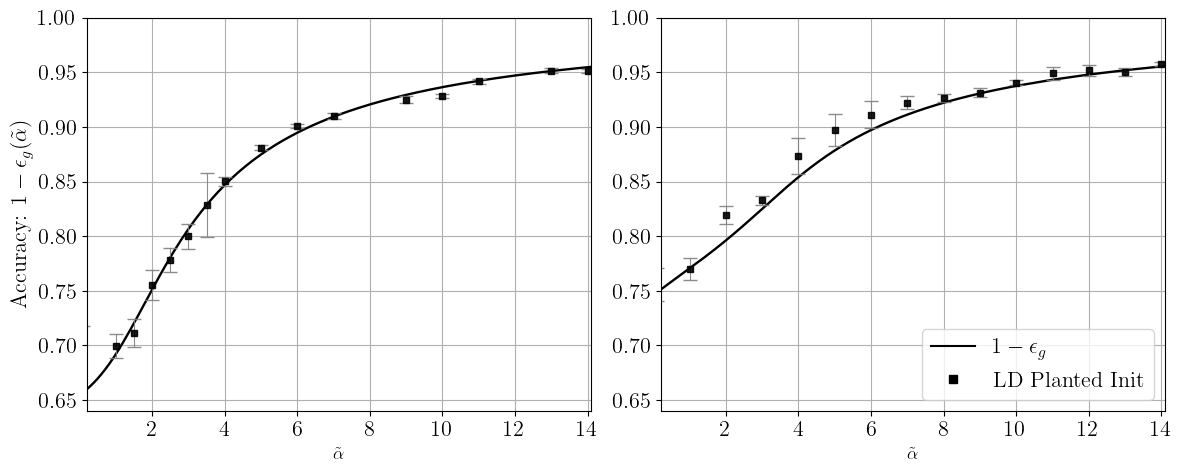

In [73]:
fig, axes = plt.subplots(1, len(activ_function), figsize=(12, 5))  # Slightly taller figureplt.rcParams.update({'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 10})
GD_exist=False
text_fontsize=16
mpl.rcParams.update({
    "text.usetex": True,          # Use LaTeX for text rendering
    "font.family": "serif",       # NeurIPS recommends serif fonts (e.g., Computer Modern)
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": text_fontsize,         # NeurIPS: 10pt for axis labels (matches main text)
    "font.size": text_fontsize,              # NeurIPS: 10pt base font size
    "legend.fontsize": text_fontsize,         # Slightly smaller for legends (not specified by NeurIPS, but 8pt ensures readability)
    "xtick.labelsize": text_fontsize,         # Smaller ticks to avoid clutter (NeurIPS does not specify, but 8pt is common)
    "ytick.labelsize": text_fontsize,
})

for i, key in enumerate(activ_function):
    
    x_ticks = np.arange(0, x_max, 1)
    if len(activ_function)>1:
        ax1=axes[i]
        axes[i].set_ylim(y_min, y_max)
    else:
        ax1=axes
        ax1.set_ylim(y_min, y_max)
        
    #Limit x-axis
    ax1.set_xlim(x_min, x_max)
    
    # Add Generalization error
    if i==0:
        ax1.set_ylabel(r'Generalization Error $\epsilon_g$')
        
    #THEORY 
    root="betainf_lambda0p0classification"
    Th_directory = f"data_for_figures/{key}_{root}/Theory/"
        
    # Overlaps
    TS_0 = pd.read_csv(Th_directory+'TS_0.txt', names=cols, header=None, sep=' ')
    TS_1 = pd.read_csv(Th_directory+'TS_1.txt', names=cols, header=None, sep=' ')
    
    
    # EXPERIMENTS
    Ex_directory = f"data_for_figures/{key}_{root}/Experiments/"
    # Planted initialization 
    TSDiag_planted = pd.read_csv(Ex_directory+'Planted/Diag_TS.txt',sep=' ', names=colsN, header=None)
    TSOffDiag_planted = pd.read_csv(Ex_directory+'Planted/OffDiag_TS.txt',sep=' ', names=colsN, header=None)
    error_planted =  pd.read_csv(Ex_directory+'Planted/Error.txt',sep=' ', names=colsN, header=None)

    
    # Random initialization 
    TSDiag_random = pd.read_csv(Ex_directory+'Random/Diag_TS.txt', names=colsN, header=None,sep=' ')
    TSOffDiag_random = pd.read_csv(Ex_directory+'Random/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
    error_random =  pd.read_csv(Ex_directory+'Random/Error.txt', names=colsN, header=None,sep=' ')
    
    
    #GD Exist
    if GD_exist:
        print("GD")
        TSDiag_GD = pd.read_csv(Ex_directory+'GD/Diag_TS.txt', names=colsN, header=None,sep=' ')
        TSOffDiag_GD = pd.read_csv(Ex_directory+'GD/OffDiag_TS.txt', names=colsN, header=None,sep=' ')
        error_GD = pd.read_csv(Ex_directory+'GD/Error.txt', names=colsN, header=None,sep=' ') 
    
    
    #Theoretical Data
    error_0 = pd.read_csv(Th_directory+'Error_0.txt', names=colse, header=None,sep=' ')
    error_1 = pd.read_csv(Th_directory+'Error_1.txt', names=colse, header=None,sep=' ')
    spe_error = ax1.plot(error_1['alpha'],  1-error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error = ax1.semilogy(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.semilogy(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error = ax1.plot(error_1['alpha'],  error_1['val'], markers[theo_indice_spe], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    #spe_error_2 = ax1.plot(error_0['alpha'],  error_0['val'], markers[theo_indice_meta], color=error_color, alpha=alpha_list[theo_indice_spe], linewidth=linewidth_theory)[0]
    
    
    # -- experiments --
    error_planted = ax1.errorbar(error_planted['alpha'], 1-error_planted['val'], error_planted['std'], fmt=markers[planted_indice], color=error_color, markersize=m_size, alpha=alpha_list[planted_indice],
                                 capsize=5, linewidth=linewidth_planted, markeredgecolor=error_color, ecolor=ecolor)
    if GD_exist:
            error_GD = ax1.errorbar(error_GD['alpha'], error_GD['val'], error_GD['std'], fmt=markers[GD_indice], color=error_color, markersize=m_size, alpha=alpha_list[GD_indice], capsize=5
                                    ,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
            
    #error_random = ax1.errorbar(error_random['alpha'], error_random['val'], error_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size, alpha=alpha_list[random_indice],
    #                            capsize=5,linewidth=linewidth_random, markeredgecolor=error_color,ecolor=ecolor)
    
    
    ax1.tick_params(axis='y')
    if i == 0:
        #ax1.set_ylabel(r'Generalization Error $\epsilon_g(\alpha)$')
        ax1.set_ylabel(r'Accuracy: $1-\epsilon_g(\tilde{\alpha})$')
        
    
    if with_overlap:
        # Twin axes for ax2
        ax2 = ax1.twinx()
        #ax2.set_ylim(y1_min, y1_max)
        #ax2.set_xlim(x_min, x_max)
        
        if i==1:
            ax2.set_ylabel(r'$T-S Overlap (m_d, m_a)$',fontsize=fontsize)
        
        # -- specialized sol -- 
        spe_diag_overlap = ax2.plot(TS_1[xvar], TS_1['m0'], '-', color=diag_ts_color, linewidth=linewidth_theory)[0]
        
        #Diagonal
        planted_diag_overlap = ax2.errorbar(TSDiag_planted['alpha'], TSDiag_planted['val'], TSDiag_planted['std'], fmt=markers[planted_indice], color=diag_ts_color, markersize=m_size,
                                            alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=diag_ts_color,ecolor=ecolor)
        random_diag_overlap = ax2.errorbar(TSDiag_random['alpha'], TSDiag_random['val'], TSDiag_random['std'], fmt=markers[random_indice], color=color_num, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_diag_overlap = ax2.errorbar(TSDiag_GD['alpha'], TSDiag_GD['val'], TSDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=diag_ts_color,ecolor=ecolor)
            
        
        #OffDiagonal
        random_off_overlap = ax2.errorbar(TSOffDiag_random['alpha'], TSOffDiag_random['val'], TSOffDiag_random['std'],fmt=markers[random_indice],color=off_ts_color, markersize=m_size,
                                        alpha=alpha_list[random_indice], capsize=4,linewidth=linewidth_planted, markeredgecolor=off_ts_color,ecolor=ecolor)
        planted_off_overlap = ax2.errorbar(TSOffDiag_planted['alpha'], TSOffDiag_planted['val'], TSOffDiag_planted['std'],fmt=markers[planted_indice],color=color_num, markersize=m_size,
                                        alpha=alpha_list[planted_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        if GD_exist:
            GD_off_overlap = ax2.errorbar(TSOffDiag_GD['alpha'], TSOffDiag_GD['val'], TSOffDiag_GD['std'],fmt=markers[GD_indice],color=color_num,
                                            markersize=m_size, alpha=alpha_list[GD_indice], capsize=4,linewidth=linewidth_random, markeredgecolor=off_ts_color,ecolor=ecolor)
        
        if i == 0:
            legend_elements.append((spe_error_2, f'{branch_name_after_metastable} ($\epsilon_g$)'))
            legend_elements.append((unstable_off_overlap, r'{} $m_a$'.format(branch_name_after_metastable)))
            
    ax1.set_xlabel(r'$\tilde{\alpha}$', fontsize=fontsize)
    ax1.set_label("")
    ax1.grid(True)
    ax1.set_xticks([i*2 for i in range(int(x_max))])
    ax1.set_xlim(x_min, x_max)
    #ax1.grid(True)

# Adjust layout to make space for the legend
plt.subplots_adjust(bottom=0.3)


legend_handles = [
    mlines.Line2D([], [], color=error_color, linestyle=markers[theo_indice_spe], label=r' $1-\epsilon_g$'),
    mlines.Line2D([], [], color=error_color, markeredgecolor=error_color, marker=markers[planted_indice], linestyle='None', label=r'LD Planted Init')]


# Create unified legend
handles = legend_handles  # Use the list of Line2D objects directly as handles
labels = [h.get_label() for h in handles]  # Extract labels from each handle

plt.legend(handles, labels, ncol=1, frameon=True, loc='lower right')

# Adjust layout (ensure this is after legend creation)
fig.tight_layout()

# Save figure
plt.savefig(f"figures/{name_file_pdf}_classification_accuracy.pdf", bbox_inches='tight', dpi=300)
plt.show()